# Applying Nueral network using Keras library

In [72]:
import pickle
import pandas as pd
import numpy as np

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [4]:
# To evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Working on model

In [5]:
df = pd.read_csv('clean_feature.csv')

In [29]:
df.shape

(1200, 28)

In [6]:
df.head()

,Months.customer,Minutes.in.2018,Number.of.SMS,KBs.used,Total.Unique.Calls,Churn.Status,Customer.Age,LoginsSite.Last.Month,EndSubscription,Total.Call.centre.complaint.calls,...,Province_Overijssel,Province_Utrecht,Province_Zeeland,Province_Zuid-Holland,Previous.provider_Ben,Previous.provider_KPN,Previous.provider_T-Mobile,Previous.provider_TELE2,Previous.provider_Telfort,Previous.provider_Vodafone
0,126.83,4091.6160,81,3.624375e+03,117,0,44,6,5,2,...,0,1,0,0,0,1,0,0,0,0
1,96.83,3179.2800,101,5.518428e+05,106,0,31,8,4,2,...,0,0,0,0,0,0,0,0,1,0
2,127.30,7233.1824,79,2.128473e+06,94,0,35,6,5,3,...,0,0,0,0,0,0,0,1,0,0
3,121.43,7336.1760,121,2.180738e+04,450,1,54,5,3,1,...,0,0,0,0,1,0,0,0,0,0
4,126.97,5390.9400,16,4.648857e+05,308,0,53,7,3,2,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# Checking rows now
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [8]:
summary_missing(df)

No. of fields:  1200
No. of missing fields:  0


,No. of mising Value,%age of missing Value


**Separate features**

In [9]:
y=df['Churn.Status'].values

In [10]:
type(y)

numpy.ndarray

In [11]:
df_model = df.drop(['Churn.Status'], axis=1)

### Normalize

In [12]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df_model)

C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hassan\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
X[:2]

array([[ 1.81233973, -0.08501568,  0.84931911, -0.31303268, -0.2806863 ,
        -0.30603414,  0.111791  ,  0.22734047,  0.03398389,  1.22363692,
        -0.18328047, -0.17332893, -0.37652323, -0.15171652, -0.25264558,
        -0.40486853, -0.42965125, -0.25819889,  3.5331496 , -0.17586311,
        -0.56066773, -0.40765274,  1.83835852, -0.35156152, -0.55938384,
        -0.33178797, -0.41733475],
       [ 1.12294446, -0.21213609,  1.18043229, -0.23401078, -0.31734247,
        -0.94123007,  1.14370789, -0.18916115,  0.03398389, -0.21323965,
        -0.18328047, -0.17332893, -0.37652323, -0.15171652, -0.25264558,
        -0.40486853, -0.42965125, -0.25819889, -0.28303359, -0.17586311,
        -0.56066773, -0.40765274, -0.54396354, -0.35156152, -0.55938384,
         3.01397306, -0.41733475]])

In [14]:
X.shape

(1200, 27)

In [15]:
type(X)

numpy.ndarray

### test-train split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1660, random_state=0)

In [17]:
#create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

In [18]:
# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [20]:
# call the function to fit to the data (training the network)
history=model.fit(X_train, y_train, epochs = 1000, batch_size=20, validation_data=(X_test, y_test))

Train on 1000 samples, validate on 200 samples
Epoch 1/1000
1000/1000 [==============================] - 1s 525us/step - loss: 0.7067 - acc: 0.4950 - val_loss: 0.7016 - val_acc: 0.4650
Epoch 2/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.6919 - acc: 0.5150 - val_loss: 0.6936 - val_acc: 0.5050
Epoch 3/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.6838 - acc: 0.5720 - val_loss: 0.6898 - val_acc: 0.5300
Epoch 4/1000
1000/1000 [==============================] - 0s 173us/step - loss: 0.6713 - acc: 0.6110 - val_loss: 0.6825 - val_acc: 0.5500
Epoch 5/1000
1000/1000 [==============================] - 0s 74us/step - loss: 0.6566 - acc: 0.6500 - val_loss: 0.6733 - val_acc: 0.5700
Epoch 6/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.6397 - acc: 0.6840 - val_loss: 0.6650 - val_acc: 0.5850
Epoch 7/1000
1000/1000 [==============================] - 0s 77us/step - loss: 0.6181 - acc: 0.6920 - val_loss: 0.6569 - val_acc:

Epoch 60/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.3554 - acc: 0.8570 - val_loss: 0.8442 - val_acc: 0.6550
Epoch 61/1000
1000/1000 [==============================] - 0s 47us/step - loss: 0.3485 - acc: 0.8550 - val_loss: 0.8516 - val_acc: 0.6500
Epoch 62/1000
1000/1000 [==============================] - 0s 76us/step - loss: 0.3393 - acc: 0.8660 - val_loss: 0.8192 - val_acc: 0.6800
Epoch 63/1000
1000/1000 [==============================] - 0s 50us/step - loss: 0.3419 - acc: 0.8470 - val_loss: 0.8682 - val_acc: 0.6700
Epoch 64/1000
1000/1000 [==============================] - 0s 71us/step - loss: 0.3369 - acc: 0.8630 - val_loss: 0.8593 - val_acc: 0.6800
Epoch 65/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.3324 - acc: 0.8630 - val_loss: 0.8645 - val_acc: 0.6650
Epoch 66/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.3267 - acc: 0.8670 - val_loss: 0.8625 - val_acc: 0.6650
Epoch 67/1000
1000/1000 [=========

1000/1000 [==============================] - 0s 63us/step - loss: 0.1328 - acc: 0.9560 - val_loss: 1.9479 - val_acc: 0.6550
Epoch 179/1000
1000/1000 [==============================] - 0s 65us/step - loss: 0.1308 - acc: 0.9570 - val_loss: 1.9510 - val_acc: 0.6450
Epoch 180/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.1275 - acc: 0.9590 - val_loss: 1.8938 - val_acc: 0.6500
Epoch 181/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.1310 - acc: 0.9600 - val_loss: 1.9240 - val_acc: 0.6550
Epoch 182/1000
1000/1000 [==============================] - 0s 62us/step - loss: 0.1278 - acc: 0.9560 - val_loss: 1.9538 - val_acc: 0.6350
Epoch 183/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.1278 - acc: 0.9580 - val_loss: 2.0033 - val_acc: 0.6400
Epoch 184/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.1271 - acc: 0.9590 - val_loss: 2.0153 - val_acc: 0.6400
Epoch 185/1000
1000/1000 [================

1000/1000 [==============================] - 0s 60us/step - loss: 0.0896 - acc: 0.9750 - val_loss: 2.3539 - val_acc: 0.6500
Epoch 238/1000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0940 - acc: 0.9700 - val_loss: 2.3003 - val_acc: 0.6450
Epoch 239/1000
1000/1000 [==============================] - 0s 48us/step - loss: 0.0782 - acc: 0.9780 - val_loss: 2.3924 - val_acc: 0.6550
Epoch 240/1000
1000/1000 [==============================] - 0s 74us/step - loss: 0.0856 - acc: 0.9790 - val_loss: 2.3321 - val_acc: 0.6450
Epoch 241/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0855 - acc: 0.9740 - val_loss: 2.2976 - val_acc: 0.6500
Epoch 242/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0814 - acc: 0.9790 - val_loss: 2.4390 - val_acc: 0.6650
Epoch 243/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0857 - acc: 0.9770 - val_loss: 2.4281 - val_acc: 0.6650
Epoch 244/1000
1000/1000 [================

1000/1000 [==============================] - 0s 61us/step - loss: 0.0614 - acc: 0.9830 - val_loss: 2.6550 - val_acc: 0.6600
Epoch 297/1000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0725 - acc: 0.9820 - val_loss: 2.6651 - val_acc: 0.6650
Epoch 298/1000
1000/1000 [==============================] - 0s 67us/step - loss: 0.0832 - acc: 0.9770 - val_loss: 2.5508 - val_acc: 0.6750
Epoch 299/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.0847 - acc: 0.9740 - val_loss: 2.6080 - val_acc: 0.6650
Epoch 300/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.1071 - acc: 0.9670 - val_loss: 2.5329 - val_acc: 0.6600
Epoch 301/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.1491 - acc: 0.9550 - val_loss: 2.5321 - val_acc: 0.6450
Epoch 302/1000
1000/1000 [==============================] - 0s 44us/step - loss: 0.0976 - acc: 0.9670 - val_loss: 2.5921 - val_acc: 0.6550
Epoch 303/1000
1000/1000 [================

1000/1000 [==============================] - 0s 66us/step - loss: 0.0522 - acc: 0.9860 - val_loss: 2.8359 - val_acc: 0.6650
Epoch 356/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0471 - acc: 0.9890 - val_loss: 2.8967 - val_acc: 0.6700
Epoch 357/1000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0498 - acc: 0.9860 - val_loss: 2.9085 - val_acc: 0.6750
Epoch 358/1000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0505 - acc: 0.9870 - val_loss: 2.9253 - val_acc: 0.6700
Epoch 359/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0676 - acc: 0.9800 - val_loss: 2.8781 - val_acc: 0.6450
Epoch 360/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0876 - acc: 0.9750 - val_loss: 2.8016 - val_acc: 0.6500
Epoch 361/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0800 - acc: 0.9750 - val_loss: 2.8572 - val_acc: 0.6500
Epoch 362/1000
1000/1000 [================

1000/1000 [==============================] - 0s 64us/step - loss: 0.0653 - acc: 0.9810 - val_loss: 2.8367 - val_acc: 0.6600
Epoch 415/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0693 - acc: 0.9820 - val_loss: 2.9557 - val_acc: 0.6600
Epoch 416/1000
1000/1000 [==============================] - 0s 64us/step - loss: 0.0702 - acc: 0.9820 - val_loss: 2.7620 - val_acc: 0.6600
Epoch 417/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0702 - acc: 0.9790 - val_loss: 2.8592 - val_acc: 0.6550
Epoch 418/1000
1000/1000 [==============================] - 0s 58us/step - loss: 0.0487 - acc: 0.9870 - val_loss: 2.9036 - val_acc: 0.6450
Epoch 419/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0506 - acc: 0.9850 - val_loss: 2.9540 - val_acc: 0.6550
Epoch 420/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0575 - acc: 0.9820 - val_loss: 2.8437 - val_acc: 0.6550
Epoch 421/1000
1000/1000 [================

1000/1000 [==============================] - 0s 61us/step - loss: 0.0473 - acc: 0.9900 - val_loss: 2.8946 - val_acc: 0.6500
Epoch 474/1000
1000/1000 [==============================] - 0s 68us/step - loss: 0.0457 - acc: 0.9890 - val_loss: 2.9594 - val_acc: 0.6450
Epoch 475/1000
1000/1000 [==============================] - 0s 64us/step - loss: 0.0467 - acc: 0.9870 - val_loss: 2.9660 - val_acc: 0.6500
Epoch 476/1000
1000/1000 [==============================] - 0s 73us/step - loss: 0.0427 - acc: 0.9890 - val_loss: 2.9752 - val_acc: 0.6450
Epoch 477/1000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0396 - acc: 0.9900 - val_loss: 3.0338 - val_acc: 0.6500
Epoch 478/1000
1000/1000 [==============================] - 0s 64us/step - loss: 0.0439 - acc: 0.9900 - val_loss: 3.0077 - val_acc: 0.6450
Epoch 479/1000
1000/1000 [==============================] - 0s 68us/step - loss: 0.0370 - acc: 0.9920 - val_loss: 3.0271 - val_acc: 0.6450
Epoch 480/1000
1000/1000 [================

1000/1000 [==============================] - 0s 65us/step - loss: 0.0366 - acc: 0.9910 - val_loss: 3.0930 - val_acc: 0.6350
Epoch 533/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0392 - acc: 0.9900 - val_loss: 3.1195 - val_acc: 0.6300
Epoch 534/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0383 - acc: 0.9910 - val_loss: 3.1507 - val_acc: 0.6350
Epoch 535/1000
1000/1000 [==============================] - 0s 48us/step - loss: 0.0461 - acc: 0.9860 - val_loss: 3.2543 - val_acc: 0.6400
Epoch 536/1000
1000/1000 [==============================] - 0s 71us/step - loss: 0.0613 - acc: 0.9820 - val_loss: 3.1668 - val_acc: 0.6550
Epoch 537/1000
1000/1000 [==============================] - 0s 47us/step - loss: 0.0454 - acc: 0.9880 - val_loss: 3.1776 - val_acc: 0.6250
Epoch 538/1000
1000/1000 [==============================] - 0s 76us/step - loss: 0.0480 - acc: 0.9870 - val_loss: 3.0607 - val_acc: 0.6300
Epoch 539/1000
1000/1000 [================

Epoch 591/1000
1000/1000 [==============================] - 0s 73us/step - loss: 0.0716 - acc: 0.9750 - val_loss: 2.7887 - val_acc: 0.6600
Epoch 592/1000
1000/1000 [==============================] - 0s 71us/step - loss: 0.0859 - acc: 0.9720 - val_loss: 2.9592 - val_acc: 0.6150
Epoch 593/1000
1000/1000 [==============================] - 0s 76us/step - loss: 0.0654 - acc: 0.9800 - val_loss: 3.0945 - val_acc: 0.6400
Epoch 594/1000
1000/1000 [==============================] - 0s 72us/step - loss: 0.0622 - acc: 0.9840 - val_loss: 3.1840 - val_acc: 0.6350
Epoch 595/1000
1000/1000 [==============================] - 0s 82us/step - loss: 0.0515 - acc: 0.9840 - val_loss: 3.0914 - val_acc: 0.6400
Epoch 596/1000
1000/1000 [==============================] - 0s 73us/step - loss: 0.0420 - acc: 0.9900 - val_loss: 3.1880 - val_acc: 0.6350
Epoch 597/1000
1000/1000 [==============================] - 0s 74us/step - loss: 0.0398 - acc: 0.9910 - val_loss: 3.2041 - val_acc: 0.6350
Epoch 598/1000
1000/1000 [=

Epoch 650/1000
1000/1000 [==============================] - 0s 68us/step - loss: 0.0370 - acc: 0.9920 - val_loss: 3.2587 - val_acc: 0.6450
Epoch 651/1000
1000/1000 [==============================] - 0s 67us/step - loss: 0.0413 - acc: 0.9880 - val_loss: 3.3017 - val_acc: 0.6400
Epoch 652/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0339 - acc: 0.9920 - val_loss: 3.2872 - val_acc: 0.6400
Epoch 653/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.0413 - acc: 0.9890 - val_loss: 3.3588 - val_acc: 0.6400
Epoch 654/1000
1000/1000 [==============================] - 0s 68us/step - loss: 0.0371 - acc: 0.9910 - val_loss: 3.3347 - val_acc: 0.6350
Epoch 655/1000
1000/1000 [==============================] - 0s 71us/step - loss: 0.0340 - acc: 0.9920 - val_loss: 3.3608 - val_acc: 0.6350
Epoch 656/1000
1000/1000 [==============================] - 0s 68us/step - loss: 0.0337 - acc: 0.9920 - val_loss: 3.3794 - val_acc: 0.6500
Epoch 657/1000
1000/1000 [=

Epoch 709/1000
1000/1000 [==============================] - 0s 67us/step - loss: 0.0382 - acc: 0.9890 - val_loss: 3.2698 - val_acc: 0.6300
Epoch 710/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.0395 - acc: 0.9890 - val_loss: 3.2700 - val_acc: 0.6300
Epoch 711/1000
1000/1000 [==============================] - 0s 75us/step - loss: 0.0338 - acc: 0.9920 - val_loss: 3.2751 - val_acc: 0.6350
Epoch 712/1000
1000/1000 [==============================] - 0s 81us/step - loss: 0.0367 - acc: 0.9910 - val_loss: 3.2849 - val_acc: 0.6350
Epoch 713/1000
1000/1000 [==============================] - 0s 82us/step - loss: 0.0326 - acc: 0.9920 - val_loss: 3.3155 - val_acc: 0.6350
Epoch 714/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.0340 - acc: 0.9920 - val_loss: 3.3141 - val_acc: 0.6300
Epoch 715/1000
1000/1000 [==============================] - 0s 65us/step - loss: 0.0309 - acc: 0.9930 - val_loss: 3.3035 - val_acc: 0.6300
Epoch 716/1000
1000/1000 [=

Epoch 768/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.0427 - acc: 0.9890 - val_loss: 3.1786 - val_acc: 0.6400
Epoch 769/1000
1000/1000 [==============================] - 0s 70us/step - loss: 0.0372 - acc: 0.9910 - val_loss: 3.2300 - val_acc: 0.6500
Epoch 770/1000
1000/1000 [==============================] - 0s 70us/step - loss: 0.0341 - acc: 0.9920 - val_loss: 3.2263 - val_acc: 0.6450
Epoch 771/1000
1000/1000 [==============================] - 0s 67us/step - loss: 0.0319 - acc: 0.9930 - val_loss: 3.2365 - val_acc: 0.6450
Epoch 772/1000
1000/1000 [==============================] - 0s 73us/step - loss: 0.0320 - acc: 0.9920 - val_loss: 3.2392 - val_acc: 0.6450
Epoch 773/1000
1000/1000 [==============================] - 0s 66us/step - loss: 0.0395 - acc: 0.9900 - val_loss: 3.2518 - val_acc: 0.6450
Epoch 774/1000
1000/1000 [==============================] - 0s 65us/step - loss: 0.0304 - acc: 0.9930 - val_loss: 3.2381 - val_acc: 0.6350
Epoch 775/1000
1000/1000 [=

Epoch 827/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0275 - acc: 0.9940 - val_loss: 3.4232 - val_acc: 0.6500
Epoch 828/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0316 - acc: 0.9920 - val_loss: 3.3891 - val_acc: 0.6550
Epoch 829/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0418 - acc: 0.9890 - val_loss: 3.4485 - val_acc: 0.6500
Epoch 830/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0346 - acc: 0.9900 - val_loss: 3.3471 - val_acc: 0.6500
Epoch 831/1000
1000/1000 [==============================] - 0s 48us/step - loss: 0.0794 - acc: 0.9800 - val_loss: 3.1561 - val_acc: 0.6400
Epoch 832/1000
1000/1000 [==============================] - 0s 59us/step - loss: 0.0676 - acc: 0.9810 - val_loss: 3.1091 - val_acc: 0.6600
Epoch 833/1000
1000/1000 [==============================] - 0s 63us/step - loss: 0.0900 - acc: 0.9720 - val_loss: 3.2252 - val_acc: 0.6700
Epoch 834/1000
1000/1000 [=

Epoch 886/1000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0319 - acc: 0.9920 - val_loss: 3.3732 - val_acc: 0.6350
Epoch 887/1000
1000/1000 [==============================] - 0s 65us/step - loss: 0.0472 - acc: 0.9880 - val_loss: 3.4036 - val_acc: 0.6550
Epoch 888/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0329 - acc: 0.9920 - val_loss: 3.3714 - val_acc: 0.6400
Epoch 889/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0325 - acc: 0.9920 - val_loss: 3.3835 - val_acc: 0.6350
Epoch 890/1000
1000/1000 [==============================] - 0s 65us/step - loss: 0.0324 - acc: 0.9920 - val_loss: 3.4029 - val_acc: 0.6450
Epoch 891/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0323 - acc: 0.9920 - val_loss: 3.4295 - val_acc: 0.6500
Epoch 892/1000
1000/1000 [==============================] - 0s 62us/step - loss: 0.0285 - acc: 0.9930 - val_loss: 3.4064 - val_acc: 0.6350
Epoch 893/1000
1000/1000 [=

Epoch 945/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0360 - acc: 0.9900 - val_loss: 3.3644 - val_acc: 0.6500
Epoch 946/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0319 - acc: 0.9920 - val_loss: 3.3692 - val_acc: 0.6450
Epoch 947/1000
1000/1000 [==============================] - 0s 49us/step - loss: 0.0265 - acc: 0.9940 - val_loss: 3.3751 - val_acc: 0.6450
Epoch 948/1000
1000/1000 [==============================] - 0s 57us/step - loss: 0.0285 - acc: 0.9930 - val_loss: 3.3682 - val_acc: 0.6450
Epoch 949/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0299 - acc: 0.9930 - val_loss: 3.3883 - val_acc: 0.6500
Epoch 950/1000
1000/1000 [==============================] - 0s 61us/step - loss: 0.0303 - acc: 0.9930 - val_loss: 3.3811 - val_acc: 0.6500
Epoch 951/1000
1000/1000 [==============================] - 0s 60us/step - loss: 0.0287 - acc: 0.9930 - val_loss: 3.3889 - val_acc: 0.6500
Epoch 952/1000
1000/1000 [=

In [21]:
y_pred_keras = model.predict(X_test)

In [22]:
y_pred_keras[:5]

array([[1.2701071e-03],
       [9.9997878e-01],
       [9.9996877e-01],
       [3.1993326e-04],
       [1.0000000e+00]], dtype=float32)

In [23]:
#convert in crisp class
yhat_class_keras = model.predict_classes(X_test, verbose=0)

In [24]:
print(recall_score(y_test, yhat_class_keras))
print(accuracy_score(y_test, yhat_class_keras))

0.6703296703296703
0.655


In [25]:
keras_score = recall_score(y_test, yhat_class_keras)
keras_acc = accuracy_score(y_test, yhat_class_keras)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, yhat_class_keras))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       109
           1       0.61      0.67      0.64        91

   micro avg       0.66      0.66      0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.66       200



In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

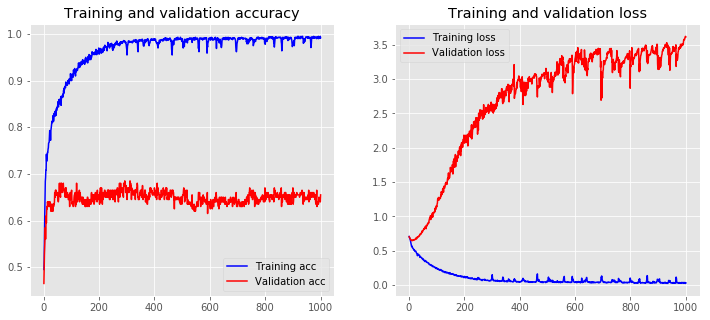

In [28]:
plot_history(history)